In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplt
import seaborn as sea
from scipy import stats
import urllib

In [26]:
data_set = pd.read_csv('AB_NYC_2019.csv')
data_set.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,NaN,NaN
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,NaN,NaN
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,NaN,NaN
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,NaN,NaN
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,6/22/2019,0.59,1,129,NaN,NaN
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/2017,0.40,1,0,NaN,NaN
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,6/24/2019,3.47,1,220,NaN,NaN
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,7/21/2017,0.99,1,0,NaN,NaN
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,6/9/2019,1.33,4,188,NaN,NaN


In [27]:
data_set.shape

(48895, 18)

In [28]:
data_set = data_set[data_set['price']>0]
data_set.head(25)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,NaN,NaN
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,NaN,NaN
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaN,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,NaN,NaN
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,NaN,NaN
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,6/22/2019,0.59,1,129,NaN,NaN
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,10/5/2017,0.40,1,0,NaN,NaN
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,6/24/2019,3.47,1,220,NaN,NaN
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,7/21/2017,0.99,1,0,NaN,NaN
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,6/9/2019,1.33,4,188,NaN,NaN


In [29]:
data_set['price'].describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='neighbourhood_group'>

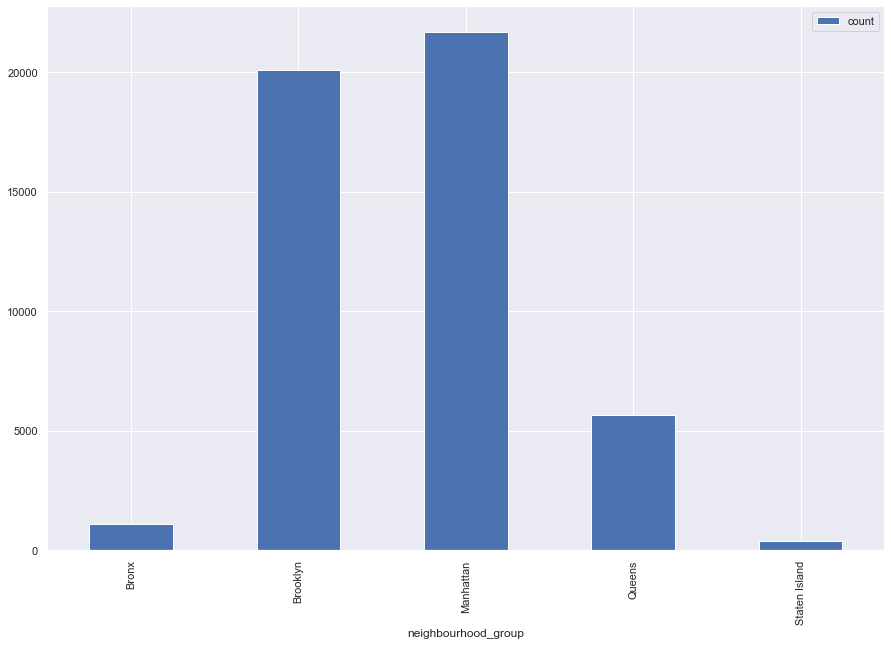

In [30]:
data_set1 = data_set.groupby('neighbourhood_group')['id'].agg(['count'])
data_set1.plot.bar()

<AxesSubplot:xlabel='price', ylabel='Density'>

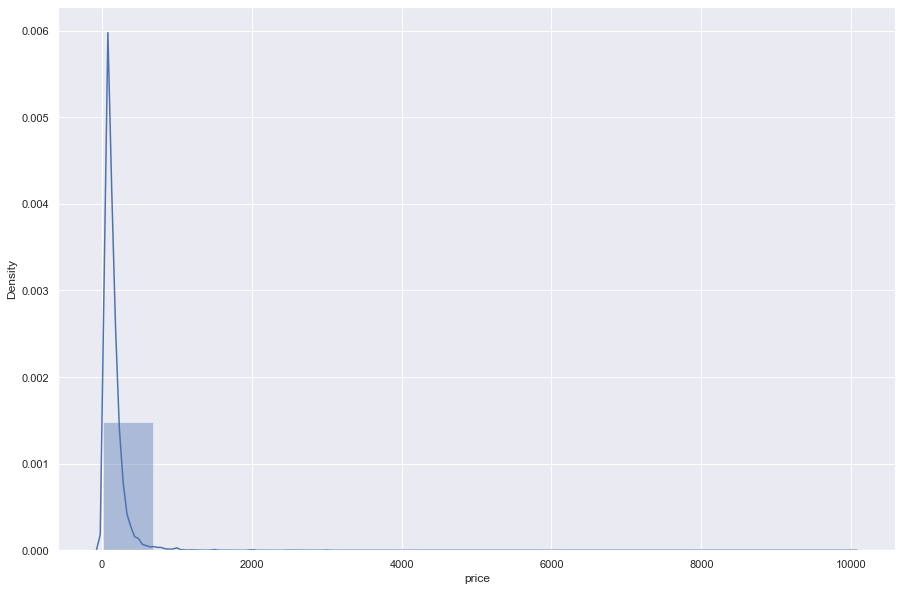

In [31]:
sea.set(rc={'figure.figsize':(15,10)})
sea.distplot(data_set['price'],kde_kws={"label": 'price'}, bins=15)

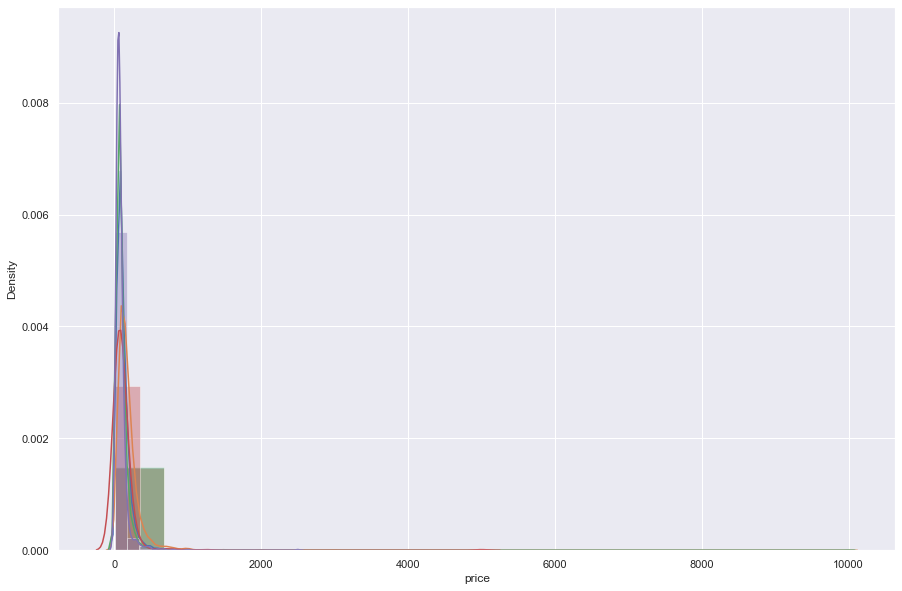

In [32]:
sea.set(rc={'figure.figsize':(15,10)})
for groups in data_set.neighbourhood_group.unique():
    sea.distplot(data_set.price[data_set['neighbourhood_group']==groups],kde_kws={"label": groups},bins=15)

In [33]:
data_set['price_log_e'] = np.log(data_set['price'])
data_set.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17,price_log_e
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,NaN,NaN,5.003946
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,NaN,NaN,5.416100
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaN,NaN,5.010635
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,NaN,NaN,4.488636
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,NaN,NaN,4.382027


<AxesSubplot:xlabel='price_log_e', ylabel='Density'>

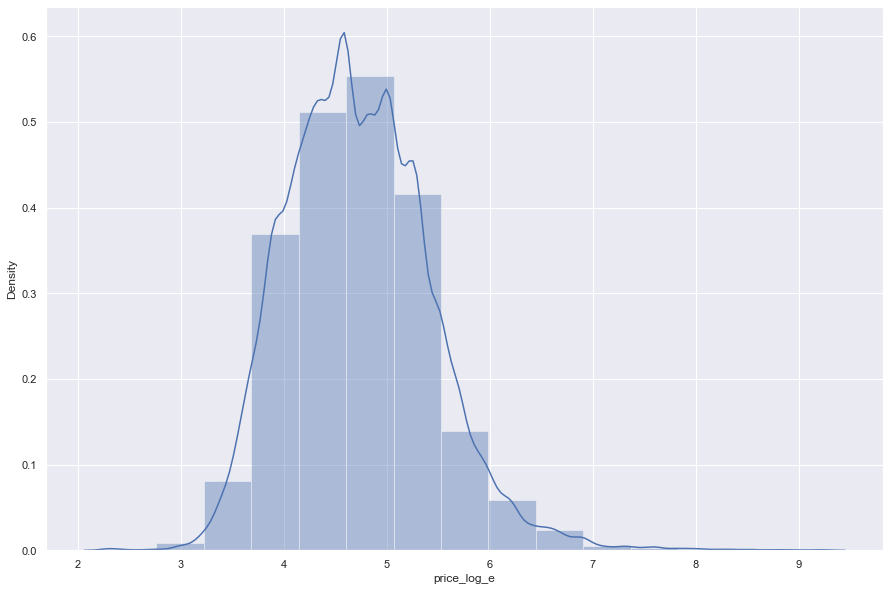

In [34]:
sea.set(rc={'figure.figsize':(15,10)})
sea.distplot(data_set['price_log_e'],kde_kws={"label": 'price in log e'},bins=15)

In [35]:
data_set['price_log_10'] = np.log10(data_set['price'])
data_set.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Unnamed: 16,Unnamed: 17,price_log_e,price_log_10
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365,NaN,NaN,5.003946,2.173186
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355,NaN,NaN,5.416100,2.352183
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,NaN,NaN,5.010635,2.176091
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194,NaN,NaN,4.488636,1.949390
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0,NaN,NaN,4.382027,1.903090


<AxesSubplot:xlabel='price_log_10', ylabel='Density'>

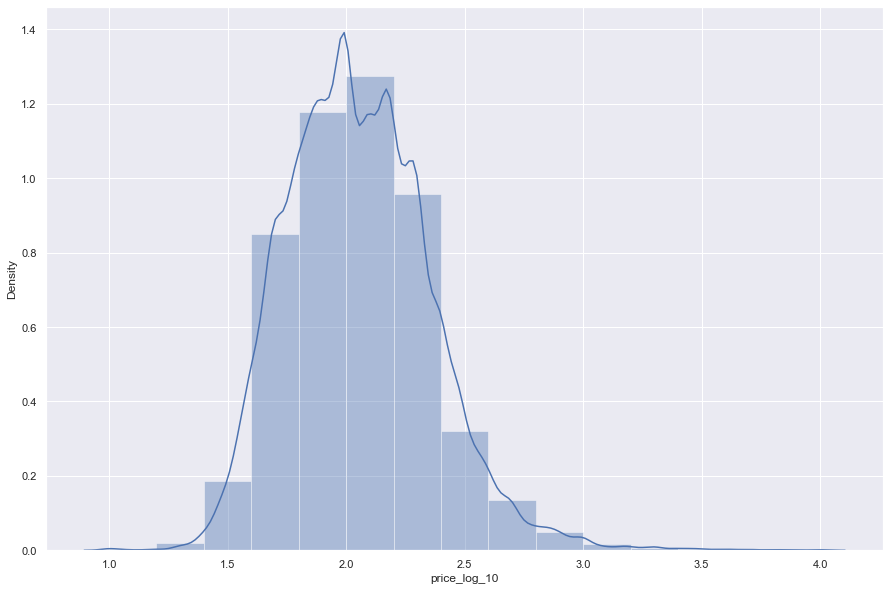

In [36]:
sea.set(rc={'figure.figsize':(15,10)})
sea.distplot(data_set['price_log_10'],kde_kws={"label": 'price in log 10'}, bins=15)

In [37]:
stats.normaltest(data_set["price_log_10"])

NormaltestResult(statistic=3926.8040825694948, pvalue=0.0)

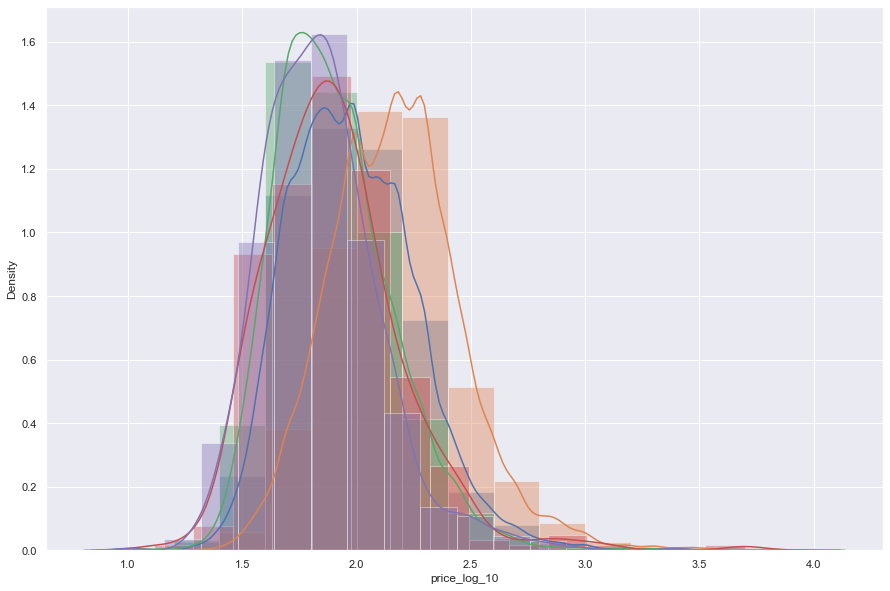

In [38]:
sea.set(rc={'figure.figsize':(15,10)})
for groups in data_set.neighbourhood_group.unique():
    sea.distplot(data_set.price_log_10[data_set['neighbourhood_group']==groups],kde_kws={"label": groups}, bins=15)

Test for Normal Distribution for  Brooklyn
------------------------------------------
NormaltestResult(statistic=3926.8040825694948, pvalue=0.0)
------------------------------------------


Test for Normal Distribution for  Manhattan
------------------------------------------
NormaltestResult(statistic=3926.8040825694948, pvalue=0.0)
------------------------------------------
Test for Normal Distribution for  Queens
------------------------------------------


NormaltestResult(statistic=3926.8040825694948, pvalue=0.0)
------------------------------------------
Test for Normal Distribution for  Staten Island
------------------------------------------
NormaltestResult(statistic=3926.8040825694948, pvalue=0.0)
------------------------------------------


Test for Normal Distribution for  Bronx
------------------------------------------
NormaltestResult(statistic=3926.8040825694948, pvalue=0.0)
------------------------------------------


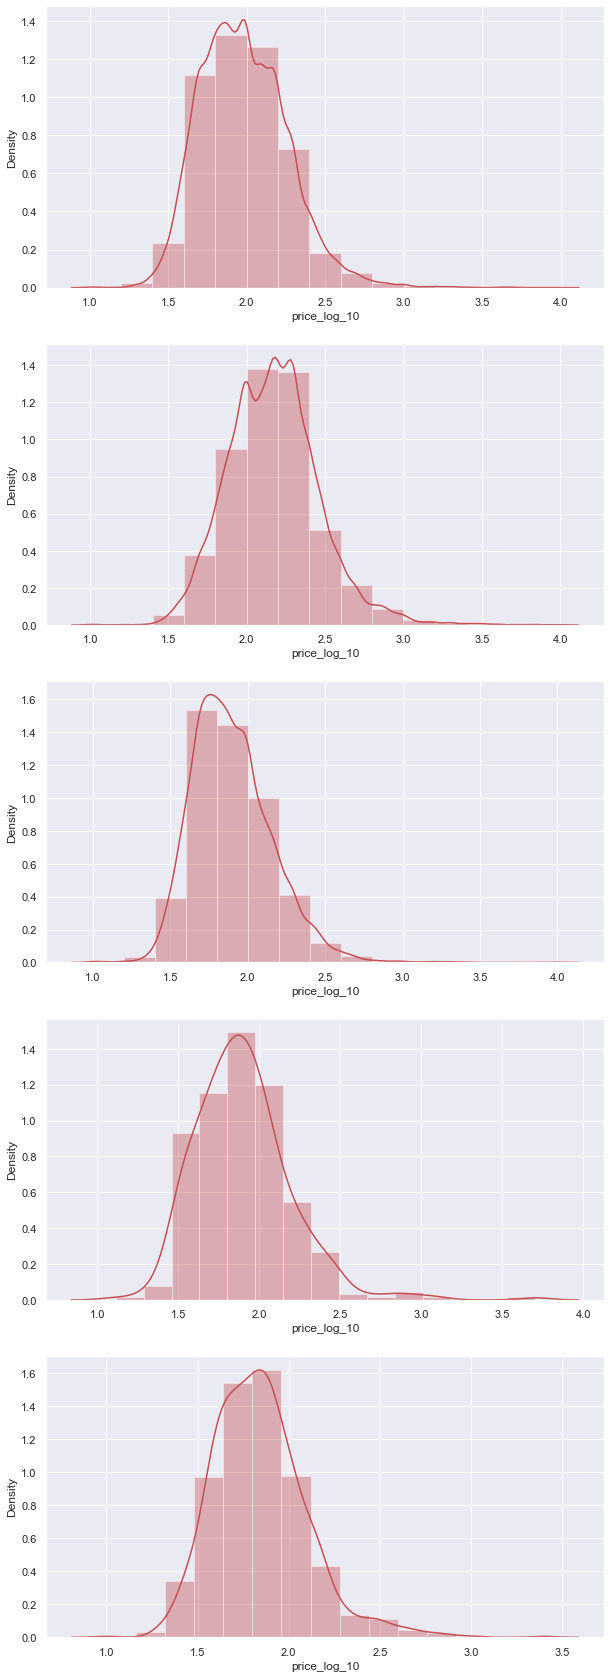

In [39]:
f = pyplt.figure(figsize=(10,30))
for i, groups in enumerate(data_set.neighbourhood_group.unique()):
    f.add_subplot(5, 1, i+1)
    sea.distplot(data_set.price_log_10[data_set['neighbourhood_group']==groups],color="r" ,kde_kws={"label": groups}, bins=15)
    print('Test for Normal Distribution for ' , groups)
    print('------------------------------------------')
    print(stats.normaltest(data_set["price_log_10"]))
    print('------------------------------------------')

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price_log_10'>

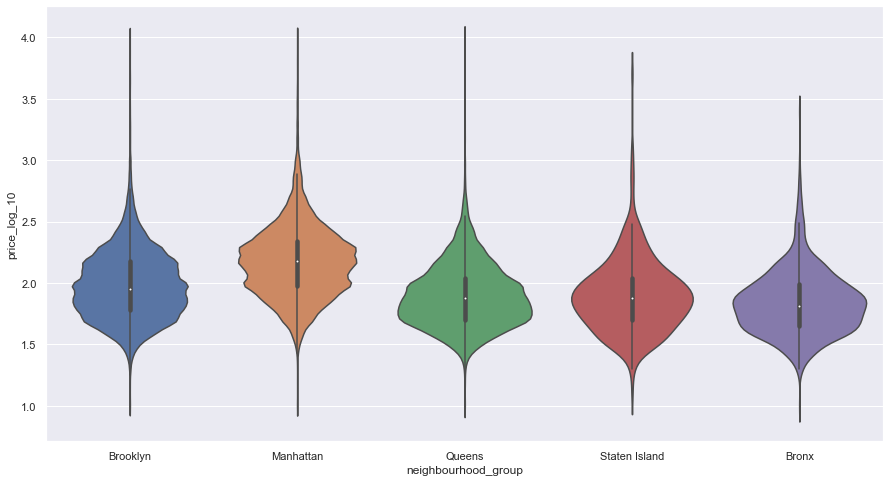

In [40]:
pyplt.figure(figsize=(15,8))
sea.violinplot("neighbourhood_group", "price_log_10", data=data_set)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price_log_10'>

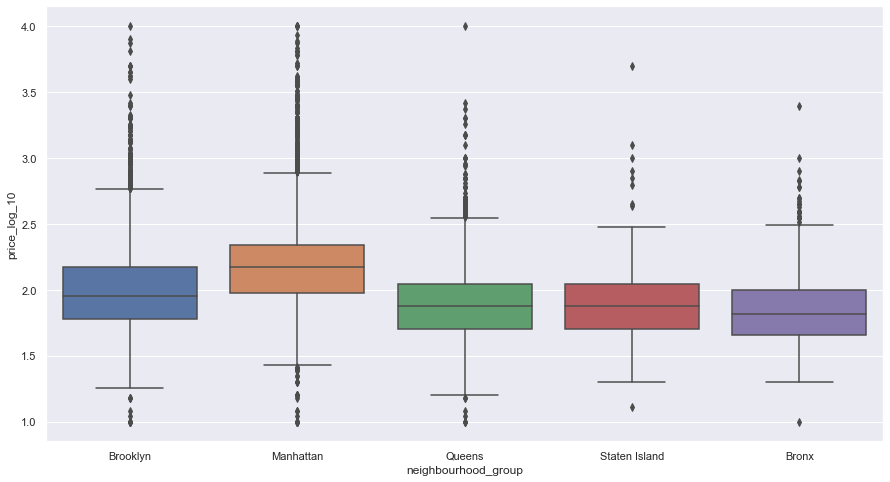

In [41]:
pyplt.figure(figsize=(15,8))
sea.boxplot("neighbourhood_group", "price_log_10", data=data_set)

In [42]:
fstat, pval = stats.f_oneway(*[data_set.price_log_10[data_set.neighbourhood_group == s]
for s in data_set.neighbourhood_group.unique()])
print("Oneway Anova log10(price) ~ neighbourhood_group F=%.2f, p-value=%E" % (fstat, pval))

Oneway Anova log10(price) ~ neighbourhood_group F=1857.21, p-value=0.000000E+00


In [43]:
data_set[["neighbourhood_group",'price']].groupby("neighbourhood_group").describe()

price                                             \
                       count        mean         std   min   25%    50%   
neighbourhood_group                                                       
Bronx                 1090.0   87.577064  106.725371  10.0  45.0   65.0   
Brooklyn             20095.0  124.438915  186.896837  10.0  60.0   90.0   
Manhattan            21660.0  196.884903  291.386838  10.0  95.0  150.0   
Queens                5666.0   99.517649  167.102155  10.0  50.0   75.0   
Staten Island          373.0  114.812332  277.620403  13.0  50.0   75.0   

                                     
                       75%      max  
neighbourhood_group                  
Bronx                 99.0   2500.0  
Brooklyn             150.0  10000.0  
Manhattan            220.0  10000.0  
Queens               110.0  10000.0  
Staten Island        110.0   5000.0

<AxesSubplot:xlabel='room_type', ylabel='price_log_10'>

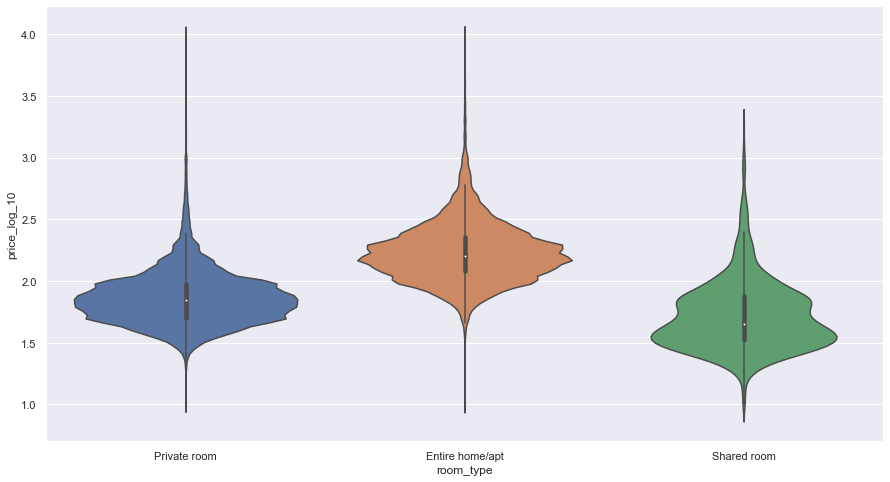

In [44]:
pyplt.figure(figsize=(15,8))
sea.violinplot("room_type", "price_log_10", data=data_set)

<AxesSubplot:xlabel='room_type', ylabel='price_log_10'>

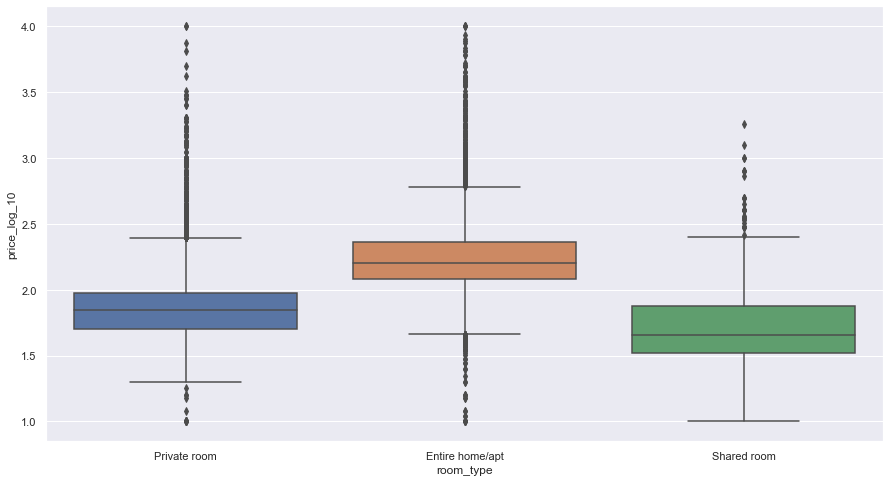

In [45]:
pyplt.figure(figsize=(15,8))
sea.boxplot("room_type", "price_log_10", data=data_set)

In [46]:
fstat, pval = stats.f_oneway(*[data_set.price_log_10[data_set.room_type == s]
for s in data_set.room_type.unique()])
print("Oneway Anova log10(price) ~ room_type F=%.2f, p-value=%E" % (fstat, pval))

Oneway Anova log10(price) ~ room_type F=15347.09, p-value=0.000000E+00


<AxesSubplot:xlabel='room_type'>

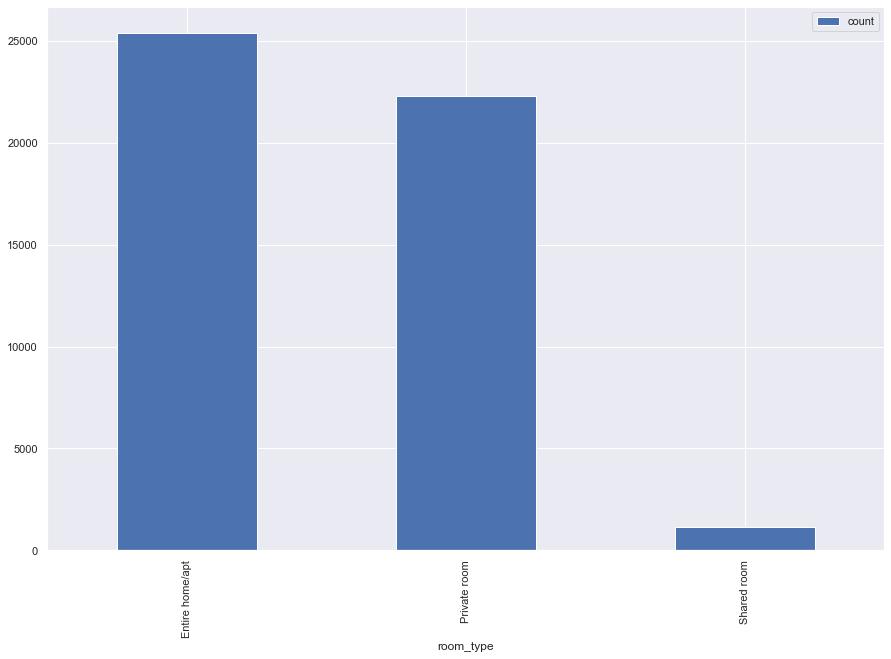

In [47]:
room = data_set.groupby('room_type')['id'].agg(['count'])
room.plot.bar()

<AxesSubplot:xlabel='host_id'>

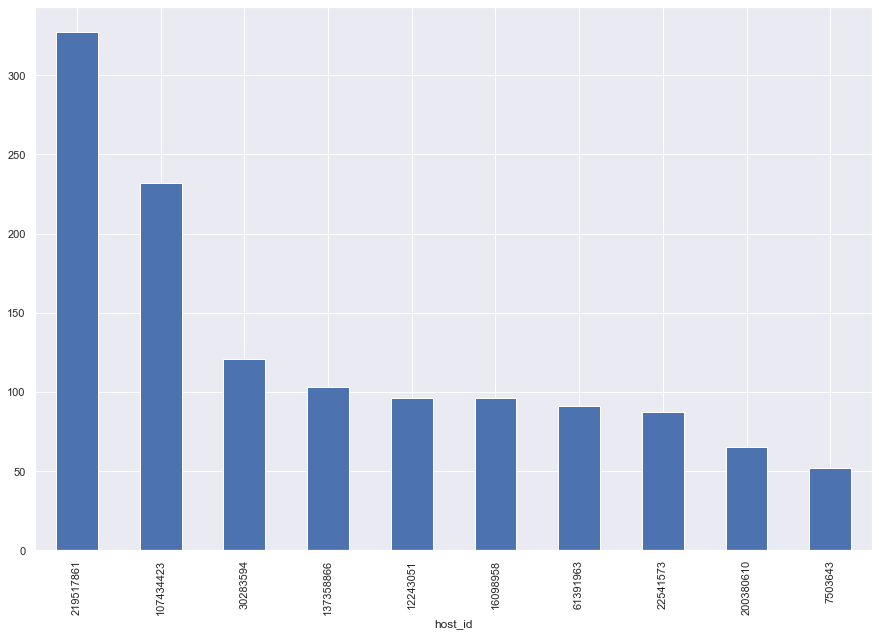

In [48]:
s = data_set.groupby('host_id').id.agg('count')
s = s.sort_values(ascending=False)[:10]
s.plot.bar()